In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv("books.csv")

In [3]:
df.head()

,Title,Author,Genre,Height,Publisher
0,Fundamentals of Wavelets,"Goswami, Jaideva",signal_processing,228,Wiley
1,Data Smart,"Foreman, John",data_science,235,Wiley
2,God Created the Integers,"Hawking, Stephen",mathematics,197,Penguin
3,Superfreakonomics,"Dubner, Stephen",economics,179,HarperCollins
4,Orientalism,"Said, Edward",history,197,Penguin


In [4]:
df['Genre'].value_counts()

Genre
fiction              64
nonfiction           30
history              26
data_science         17
philosophy           17
science              14
comic                13
computer_science     11
economics            10
mathematics           5
signal_processing     3
psychology            1
Name: count, dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Title      211 non-null    object
 1   Author     187 non-null    object
 2   Genre      211 non-null    object
 3   Height     211 non-null    int64 
 4   Publisher  115 non-null    object
dtypes: int64(1), object(4)
memory usage: 8.4+ KB


In [6]:
#cheak null value
df.isnull().sum()

Title         0
Author       24
Genre         0
Height        0
Publisher    96
dtype: int64

In [7]:
#fill null value
mode_author = df['Author'].mode()[0]
df['Author'].fillna(mode_author, inplace=True)


In [8]:
mode_publisher=df['Publisher'].mode()[0]
df['Publisher'].fillna(mode_publisher,inplace=True)

In [9]:
#cheak null value
df.isnull().sum()

Title        0
Author       0
Genre        0
Height       0
Publisher    0
dtype: int64

In [10]:
# Display summary statistics for a dataframe
df.describe()

,Height
count,211.000000
mean,206.056872
std,26.828141
min,160.000000
25%,180.000000
50%,199.000000
75%,229.500000
max,283.000000


In [11]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 1 numerical features : ['Height']

We have 4 categorical features : ['Title', 'Author', 'Genre', 'Publisher']


In [12]:
# proportion of count data on categorical columns
for col in categorical_features:
    print(df[col].value_counts(normalize=True) * 100)
    print('---------------------------')

Title
Angels & Demons                          0.947867
Fundamentals of Wavelets                 0.473934
Superman Earth One - 1                   0.473934
Pattern Classification                   0.473934
From Beirut to Jerusalem                 0.473934
                                           ...   
Last Mughal, The                         0.473934
Social Choice & Welfare, Vol 39 No. 1    0.473934
Radiowaril Bhashane & Shrutika           0.473934
Gun Gayin Awadi                          0.473934
Christmas Carol, A                       0.473934
Name: proportion, Length: 210, dtype: float64
---------------------------
Author
Steinbeck, John      15.165877
Deshpande, P L        3.317536
Rutherford, Alex      2.369668
Sen, Amartya          1.895735
Rand, Ayn             1.895735
                       ...    
Grisham, John         0.473934
Durant, Will          0.473934
Poe, Edgar Allen      0.473934
Crichton, Michael     0.473934
Dickens, Charles      0.473934
Name: proportion, Leng

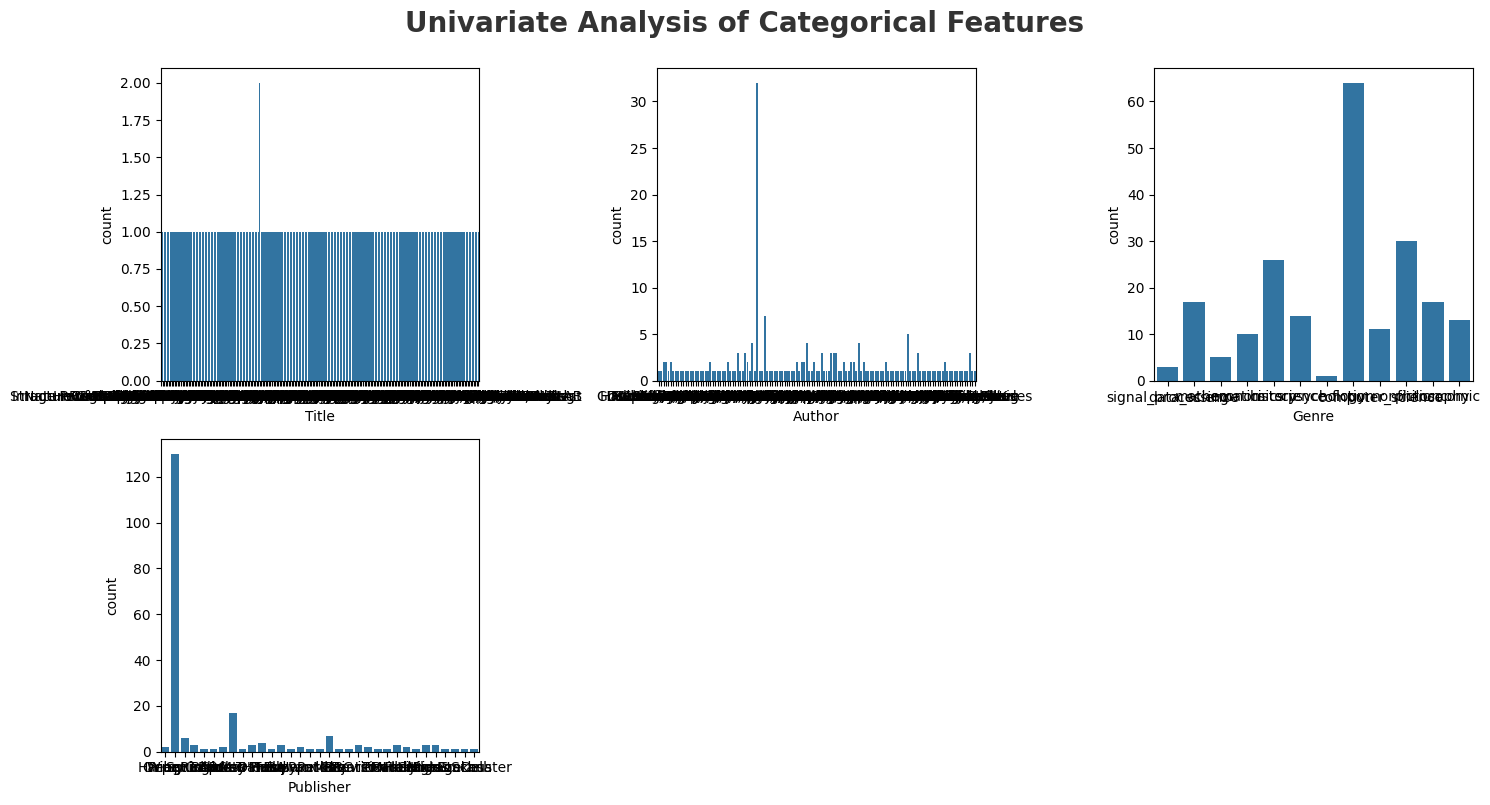

In [13]:
# categorical columns
plt.figure(figsize=(15, 8))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(categorical_features)):
    plt.subplot(2, 3, i+1)
    sns.countplot(x=df[categorical_features[i]])
    plt.xlabel(categorical_features[i])
    plt.tight_layout()
    
# save plot
# plt.savefig('./images/Univariate_Cat.png')

## Multivariate Analysis
#* Multivariate analysis is the analysis of more than one variable.

In [14]:
discrete_features=[feature for feature in numeric_features if (len(df[feature].unique())<=25 and len(df[feature].unique())>5)]

continuous_features=[feature for feature in numeric_features if len(df[feature].unique()) > 25]

encoded_categorical = [feature for feature in numeric_features if len(df[feature].unique()) <=5]

print('We have {} discrete features : {}'.format(len(discrete_features), discrete_features))
print('\nWe have {} continuous_features : {}'.format(len(continuous_features), continuous_features))
print('\nWe have {} encoded_categorical : {}'.format(len(encoded_categorical), encoded_categorical))

We have 0 discrete features : []

We have 1 continuous_features : ['Height']

We have 0 encoded_categorical : []


In [15]:
categorical_features = categorical_features + encoded_categorical
print(categorical_features)

['Title', 'Author', 'Genre', 'Publisher']


### Check Multicollinearity in Numerical features

In [16]:
df[(list(df[continuous_features])[1:])].corr()

""


* **A chi-squared test (also chi-square or χ2 test) is a statistical hypothesis test that is valid to perform when the test statistic is chi-squared distributed under the null hypothesis, specifically Pearson's chi-squared test**

* **A chi-square statistic is one way to show a relationship between two categorical variables.**

* **Here we test correlation of Categorical columns with Target column i.e stroke**

In [17]:
from scipy.stats import chi2_contingency
chi2_test = []
for feature in categorical_features:
    if chi2_contingency(pd.crosstab(df['Genre'], df[feature]))[1] < 0.05:
        chi2_test.append('Reject Null Hypothesis')
    else:
        chi2_test.append('Fail to Reject Null Hypothesis')
result = pd.DataFrame(data=[categorical_features, chi2_test]).T
result.columns = ['Column', 'Hypothesis Result']
result

,Column,Hypothesis Result
0,Title,Fail to Reject Null Hypothesis
1,Author,Reject Null Hypothesis
2,Genre,Reject Null Hypothesis
3,Publisher,Reject Null Hypothesis


#feaature engineering

In [18]:
#nnumeric feature
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
print('Num of Numerical Features :', len(numeric_features))
numeric_features

Num of Numerical Features : 1


['Height']

In [19]:
#categorical feature
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print('Num of Categorical Features :', len(categorical_features))
categorical_features

Num of Categorical Features : 4


['Title', 'Author', 'Genre', 'Publisher']

In [20]:
#discrete_features
discrete_features=[feature for feature in numeric_features if (len(df[feature].unique())<=25)]
print('Num of Discrete Features :',len(discrete_features))
discrete_features

Num of Discrete Features : 0


[]

In [21]:
#continuous_features
continuous_features=[feature for feature in numeric_features if len(df[feature].unique()) > 25]
print('Num of Continuous Features :',len(continuous_features))
continuous_features

Num of Continuous Features : 1


['Height']

In [22]:
#Imputing Null Values to Check VIF(Multi-Collinearity)
# Create copy of dataframe to check variance inflation factor
df1 = df.copy()
for i in continuous_features:
    df1[i].fillna(df1[i].median(), inplace=True)

In [23]:
!pip install statsmodels

Multicollinearity Check
Variance Inflation Factor (VIF)
Multicollinearity occurs when there are two or more independent variables in a multiple regression model, which have a high correlation among themselves. When some features are highly correlated.
Multicollinearity can be detected using various techniques, one such technique being the Variance Inflation Factor(VIF).

In [24]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def compute_vif(considered_features, df):
    
    X = df[considered_features]
    # the calculation of variance inflation requires a constant
    X['intercept'] = 1
    
    # create dataframe to store vif values
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif[vif['Variable']!='intercept']
    return vif

In [25]:
compute_vif(continuous_features, df1)

C:\Users\realme\AppData\Local\Temp\ipykernel_8984\3716651884.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['intercept'] = 1


,Variable,VIF
0,Height,1.0


” VIF determines the strength of the correlation between the independent variables. It is predicted by taking a variable and regressing it against every other variable “

VIF above 5 is indicator of Multicollinearity

- This Dataset Doesnt have any Multicollinearity

Check Outlier and Capping it
Why outliers?

Data Entry error : Human error.
Measurement error: Instrument error.
Natural error: it will be Real life data.
Intentional error: People give wrong inputs
Impact of Outliers ?

Ouliers can very high impact on few Machine learning models.
Can Cause bias in the output.

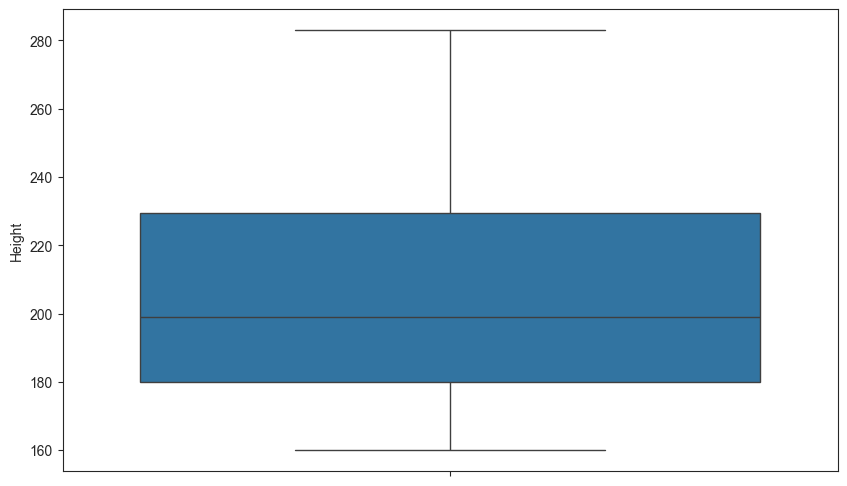

In [26]:
for i in continuous_features:
        plt.figure(figsize=(10,6))
        sns.set_style('ticks')
        ax = sns.boxplot(df[i])

Standard deviation method For Outlier Handling?

Outlier removal using standard deviation procedure.
Usually z-score =3 is considered as a cut-off value to set the limit. Therefore, any z-score greater than +3 or less than -3 is considered as outlier which is pretty much similar to standard deviation method.
Here we can remove outliers after 3rd standard deviation or z-score +3 and -3. used to remove only extreme outlier points

In [27]:
def outlier_removal(column, df):
    upper_limit = df[column].mean() + 3*df[column].std()
    lower_limit = df[column].mean() - 3*df[column].std()
    df = df[(df[column] < upper_limit) & (df[column] > lower_limit)]
    return df

In [28]:
from sklearn import preprocessing
for col in df.select_dtypes(include=['object']).columns:
    # Initialize a LabelEncoder object
    label_encoder = preprocessing.LabelEncoder()
    label_encoder.fit(df[col].unique())
    df[col]=label_encoder.transform(df[col])
    print(f"{col}:  {df[col].unique()}")

Title:  [ 80  50  84 181 144 135 106  61 100  95  49 173  26 179   2 194 176  48
 137 150 124   8 123 171 159 107  23 145  41  42 204 151 128 188 184  73
 199  72 118 163 112 166 186  76  91 178  15 110 142 131  28 102  32  40
  62 175 189  63 120  51  43 157 121   7  45   9  12 168  97 161   6 158
 167   5 119 174 160  88   4 126  24 125 103 208  86 140  37  78 205 141
  77  27  31 190 138  64  96  30   1  57  60  98  25 207 187 127 148  16
 209  87 201  14  93 169 162  38 195 143 116 192  90  56  11 196  53 198
  34 165 130 153 170 193  58 172 147  79  39   3  74 117  75  20  46 139
 182 183 114 113  52  94  22 122 105 109  65 155 154 136  85 200 177  70
  66  68  69  67 133 108   0  19  89 197 152  33  54 191  55  18 149 206
  47  29 129 146 115  13 203 202  44  59  92  36 104 132 164 111  17 156
  71 185  83  81  82  21 134 180 101  10  99  35]
Author:  [ 50  40  56  30 101 119  77  78 105  71 103 123 122 113  36  67  92  85
 125  58  86 115  13 106  76  15  19  11  28 108  39  61 

In [29]:
#split train and tesst
from sklearn.model_selection import train_test_split
X = df.drop(['Height'], axis=1)
y = df['Height']

In [30]:
df.head()

,Title,Author,Genre,Height,Publisher
0,80,50,11,228,31
1,50,40,2,235,31
2,84,56,6,197,19
3,181,30,3,179,9
4,144,101,5,197,19


In [31]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=101)

In [32]:
%%capture
!pip install scikit-surprise
!pip install surprise

     

In [33]:
pip install scikit-surprise


  Using cached scikit_surprise-1.1.4.tar.gz (154 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
Failed to build scikit-surprise
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × Building wheel for scikit-surprise (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [117 lines of output]
      running bdist_wheel
      running build
      running build_py
      creating build
      creating build\lib.win-amd64-cpython-38
      creating build\lib.win-amd64-cpython-38\surprise
      copying surprise\accuracy.py -> build\lib.win-amd64-cpython-38\surprise
      copying surprise\builtin_datasets.py -> build\lib.win-amd64-cpython-38\surprise
      copying surprise\dataset.py -> build\lib.win-amd64-cpython-38\surprise
      copying surprise\dump.py -> build\lib.win-amd64-cpython-38\surprise
      copying surprise\reader.py -> build\lib.win-amd64-cpython-38\surprise
      copying surprise\trainset.py -> build\lib.win-amd64-cpython-38\surprise
      copying surprise\utils.py -> build\lib.win-amd64-cpython-38\surprise
      copying surprise\__init__.py -> build\lib.win-amd64-cpython-38\surprise
      copying surpr

In [34]:

from surprise import NMF, SVD, SVDpp, KNNBasic, KNNWithMeans, KNNWithZScore, CoClustering
from surprise.model_selection import cross_validate
from surprise import Reader, Dataset
     

ModuleNotFoundError: No module named 'surprise'